# Lab 1 Report
## Name Sarach Rujiranurak "st121628"
## E-mail st121628@ait.asia

In this lab, I have to set up a docker on the server given from the instruction and build it to run the example code and the individual task on the server. 

I’ve followed the tutorial on connecting to the server via SSH command and set up a few things on the server and my local machine. I faced the problem of remoting to the docker via the VS code. Thus, I turned to run jupyter-lab on my docker instead. 

In the individual assignment, I executed the Alexnet code with the CIFAR dataset. I changed the number of parameters in the 1st, 4th, and 6th (output) classifiers into 4096,1024 and 10 respectively, and then trained the model with SGD with momentum = 0.9 and learning rate = 0.0001. The batch size that I used was 2,000 and the number of iteration is only 7. The accuracy that I got was around 82.5% on average. The detail of each class is as follows. 

    Accuracy of Airplane : 84 %
    Accuracy of   Car : 88 %
    Accuracy of  Bird : 77 %
    Accuracy of   Cat : 73 %
    Accuracy of  Deer : 75 %
    Accuracy of   Dog : 82 %
    Accuracy of  Frog : 78 %
    Accuracy of Horse : 84 %
    Accuracy of  Ship : 91 %
    Accuracy of Truck : 88 %

This shows that the most accurate label is Ship and followed by vehicle groups which are over 80%. For animal groups, the highest accuracy is around 84% (horse), which is only one class that is over 80%, others are below 80%. There should be some patterns that are similar features for those animals that make the model miss the prediction.

 In conclusion, I’ve learned how to set up Docker on the server and how to connect my local machine with it. I studied the concept of Alexnet for image classification and how to code and adjust the parameters using Pytorch. The accuracy of my model is around 82.5%.



In [2]:
import torch
import urllib
import os

device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

model = torch.hub.load('pytorch/vision:v0.5.0', 'alexnet', pretrained=True)

model.eval()

# Download an example image from the pytorch website

with urllib.request.urlopen('https://github.com/pytorch/hub/raw/master/images/dog.jpg') as url:
    filename = 'dog.jpg'
    with open(filename, 'wb') as f:
        f.write(url.read())

from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to(device)
    model.to(device)

with torch.no_grad():
    output = model(input_batch)

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
softmax_scores = torch.nn.functional.softmax(output[0], dim=0)

maxval, maxindex = output.max(1)
print('Maximum value', maxval, 'at index', maxindex)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


Maximum value tensor([16.8252], device='cuda:3') at index tensor([258], device='cuda:3')


In [3]:
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


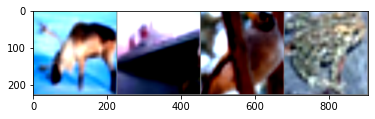

 Deer  Ship  Bird  Frog


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
#Now using the AlexNet
AlexNet_Model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
AlexNet_Model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
import torch.nn as nn
AlexNet_Model.classifier[1] = nn.Linear(9216,4096)
AlexNet_Model.classifier[4] = nn.Linear(4096,1024)
AlexNet_Model.classifier[6] = nn.Linear(1024,10)
AlexNet_Model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
AlexNet_Model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(AlexNet_Model.parameters(), lr=0.001, momentum=0.9)

In [10]:
import time

In [18]:
for epoch in range(7):  # loop over the dataset multiple times

    running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = AlexNet_Model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        #Time
        end_time = time.time()
        time_taken = end_time - start_time

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            print('Time:',time_taken)
            running_loss = 0.0

print('Finished Training of AlexNet')

[1,  2000] loss: 0.104
Time: 23.891086101531982
[1,  4000] loss: 0.107
Time: 47.792245388031006
[1,  6000] loss: 0.119
Time: 71.92283940315247
[1,  8000] loss: 0.117
Time: 96.03732800483704
[1, 10000] loss: 0.114
Time: 119.97697854042053
[1, 12000] loss: 0.124
Time: 144.30255222320557
[2,  2000] loss: 0.083
Time: 23.976327657699585
[2,  4000] loss: 0.068
Time: 48.56523418426514
[2,  6000] loss: 0.088
Time: 73.43856573104858
[2,  8000] loss: 0.096
Time: 97.72981381416321
[2, 10000] loss: 0.118
Time: 122.12557864189148
[2, 12000] loss: 0.137
Time: 146.89000606536865
[3,  2000] loss: 0.065
Time: 23.934348583221436
[3,  4000] loss: 0.083
Time: 48.42639446258545
[3,  6000] loss: 0.074
Time: 73.1909806728363
[3,  8000] loss: 0.090
Time: 97.3736846446991
[3, 10000] loss: 0.102
Time: 122.40878319740295
[3, 12000] loss: 0.085
Time: 147.2211949825287
[4,  2000] loss: 0.060
Time: 23.025593757629395
[4,  4000] loss: 0.076
Time: 46.20369553565979
[4,  6000] loss: 0.084
Time: 69.82643294334412
[4,  

In [19]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_Model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 82.50 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
preds = []
actual = [] 
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_Model(images)
        _, predicted = torch.max(outputs, 1)
        preds.append(predicted.cpu().numpy())
        actual.append(labels.cpu().numpy())
        c = (predicted == labels).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 84 %
Accuracy of   Car : 88 %
Accuracy of  Bird : 77 %
Accuracy of   Cat : 73 %
Accuracy of  Deer : 75 %
Accuracy of   Dog : 82 %
Accuracy of  Frog : 78 %
Accuracy of Horse : 84 %
Accuracy of  Ship : 91 %
Accuracy of Truck : 88 %


In [21]:
#Verifying average accuracy of the network
avg = 0
for i in range(10):
  temp = (100 * class_correct[i] / class_total[i])
  avg = avg + temp
avg = avg/10
print('Average accuracy = ', avg)  

Average accuracy =  82.5
